# Univariate Time Series With Stacked LSTM, BiLSTM, and NeuralProphet


---



Developing Deep learning LSTM, BiLSTM models, and NeuralProphet for multi-step forecasting of stock price
* This notebook is generated for the article: Univariate Time Series With Stacked LSTM, BiLSTM, and NeuralProphet.

# Import libraries



In [2]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline
from matplotlib.pylab import rcParams
from datetime import datetime
import warnings
from pylab import rcParams
from sklearn.model_selection import train_test_split as split
import warnings
import itertools
warnings.filterwarnings("ignore")
from prophet import Prophet
from IPython import display
from matplotlib import pyplot
import os
import re
#from colorama import Fore, Back, Style
import seaborn as sns
import plotly.express as px
import warnings
from matplotlib.patches import Patch

# Load data + Preprocess + Feature Transformation

In [3]:
data = pd.read_csv('AAPL.csv')

In [4]:
data['Date'] = pd.to_datetime(data['Date'], infer_datetime_format=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3654 entries, 0 to 3653
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3654 non-null   datetime64[ns]
 1   Open       3654 non-null   float64       
 2   High       3654 non-null   float64       
 3   Low        3654 non-null   float64       
 4   Close      3654 non-null   float64       
 5   Adj Close  3654 non-null   float64       
 6   Volume     3654 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 200.0 KB


In [6]:

data=data.set_index(['Date'])
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.461978,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.473150,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.370186,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.358408,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.400682,447610800


In [7]:
data.reset_index(inplace=True)

In [8]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3654 entries, 0 to 3653
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3654 non-null   datetime64[ns]
 1   Open       3654 non-null   float64       
 2   High       3654 non-null   float64       
 3   Low        3654 non-null   float64       
 4   Close      3654 non-null   float64       
 5   Adj Close  3654 non-null   float64       
 6   Volume     3654 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 200.0 KB


In [9]:
data_feature_selected = data.drop(axis=1,labels=['Open','High','Low','Close','Volume'])

In [10]:
col_order = ['Date','Adj Close']
data_feature_selected = data_feature_selected.reindex(columns=col_order)
data_feature_selected

,Date,Adj Close
0,2010-01-04,6.461978
1,2010-01-05,6.473150
2,2010-01-06,6.370186
3,2010-01-07,6.358408
4,2010-01-08,6.400682
...,...,...
3649,2024-07-05,226.339996
3650,2024-07-08,227.820007
3651,2024-07-09,228.679993
3652,2024-07-10,232.979996


In [11]:
# X1=  x1[['beds','Reviews','rating']]
# y= x1['Log_price']

In [12]:
data_feature_selected['differenced_trasnformation_demand'] = data_feature_selected['Adj Close'].diff().values
data_feature_selected.head()

,Date,Adj Close,differenced_trasnformation_demand
0,2010-01-04,6.461978,NaN
1,2010-01-05,6.473150,0.011172
2,2010-01-06,6.370186,-0.102964
3,2010-01-07,6.358408,-0.011778
4,2010-01-08,6.400682,0.042274


In [13]:
data_feature_selected['differenced_demand_filled'] = np.where(pd.isnull(data_feature_selected['differenced_trasnformation_demand']), data_feature_selected['Adj Close'], data_feature_selected['differenced_trasnformation_demand'])
data_feature_selected.head()

,Date,Adj Close,differenced_trasnformation_demand,differenced_demand_filled
0,2010-01-04,6.461978,NaN,6.461978
1,2010-01-05,6.473150,0.011172,0.011172
2,2010-01-06,6.370186,-0.102964,-0.102964
3,2010-01-07,6.358408,-0.011778,-0.011778
4,2010-01-08,6.400682,0.042274,0.042274


In [14]:
data_feature_selected['differenced_inv_transformation_demand'] = data_feature_selected['differenced_demand_filled'].cumsum()
np.testing.assert_array_equal(data_feature_selected['Adj Close'].values, data_feature_selected['differenced_inv_transformation_demand'].values)

In [15]:
data_feature_selected.head()

,Date,Adj Close,differenced_trasnformation_demand,differenced_demand_filled,differenced_inv_transformation_demand
0,2010-01-04,6.461978,NaN,6.461978,6.461978
1,2010-01-05,6.473150,0.011172,0.011172,6.473150
2,2010-01-06,6.370186,-0.102964,-0.102964,6.370186
3,2010-01-07,6.358408,-0.011778,-0.011778,6.358408
4,2010-01-08,6.400682,0.042274,0.042274,6.400682


# plot

In [16]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn.metrics as metrics
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [17]:
FIGURE_SIZE = (20, 10)
plt.rcParams['axes.grid'] = True

%matplotlib inline


<AxesSubplot: xlabel='Date'>

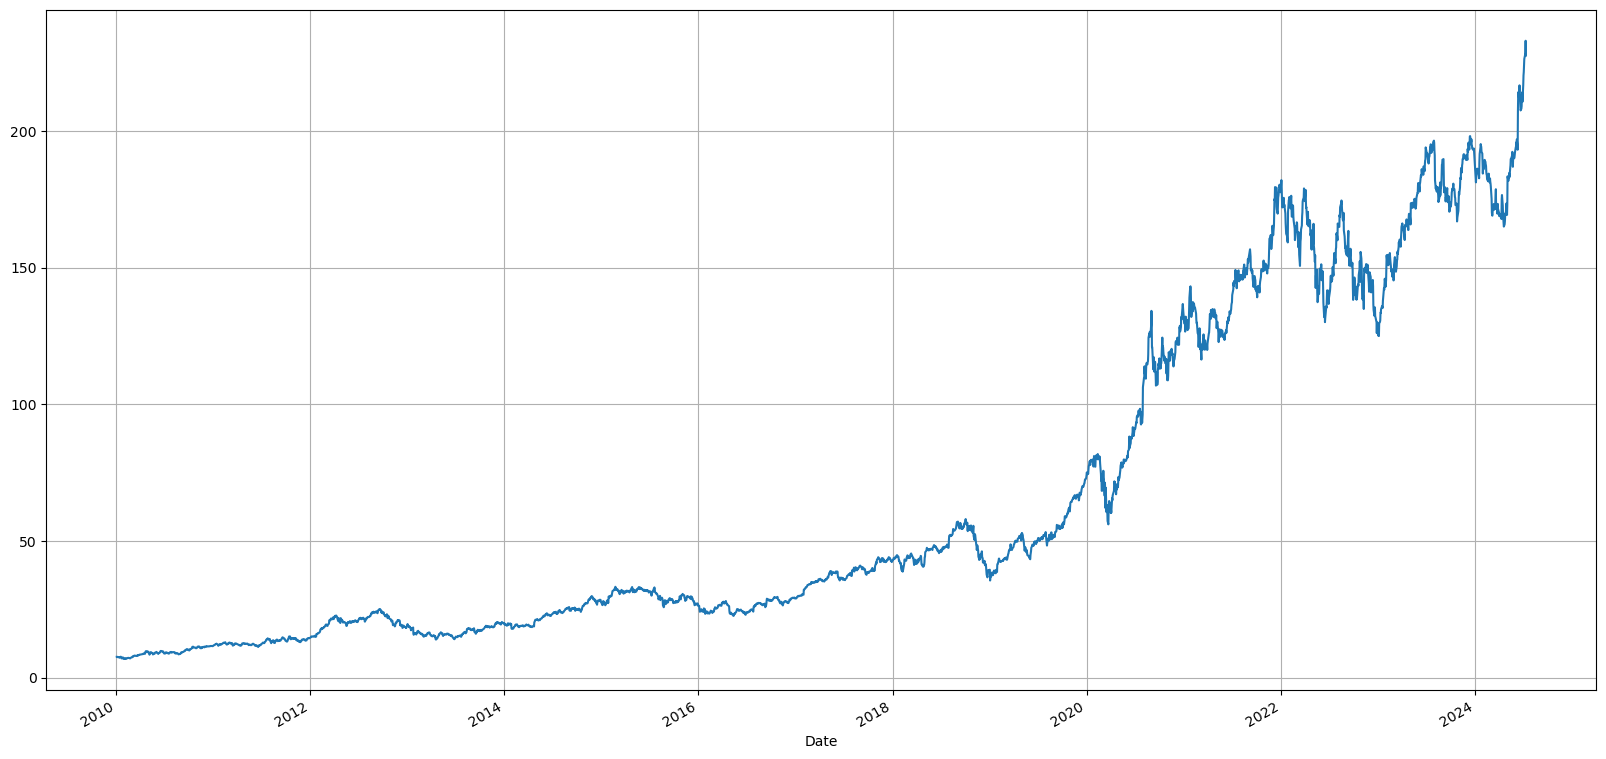

In [18]:
data.set_index('Date')['Close'].plot(figsize=FIGURE_SIZE)

<AxesSubplot: xlabel='Date'>

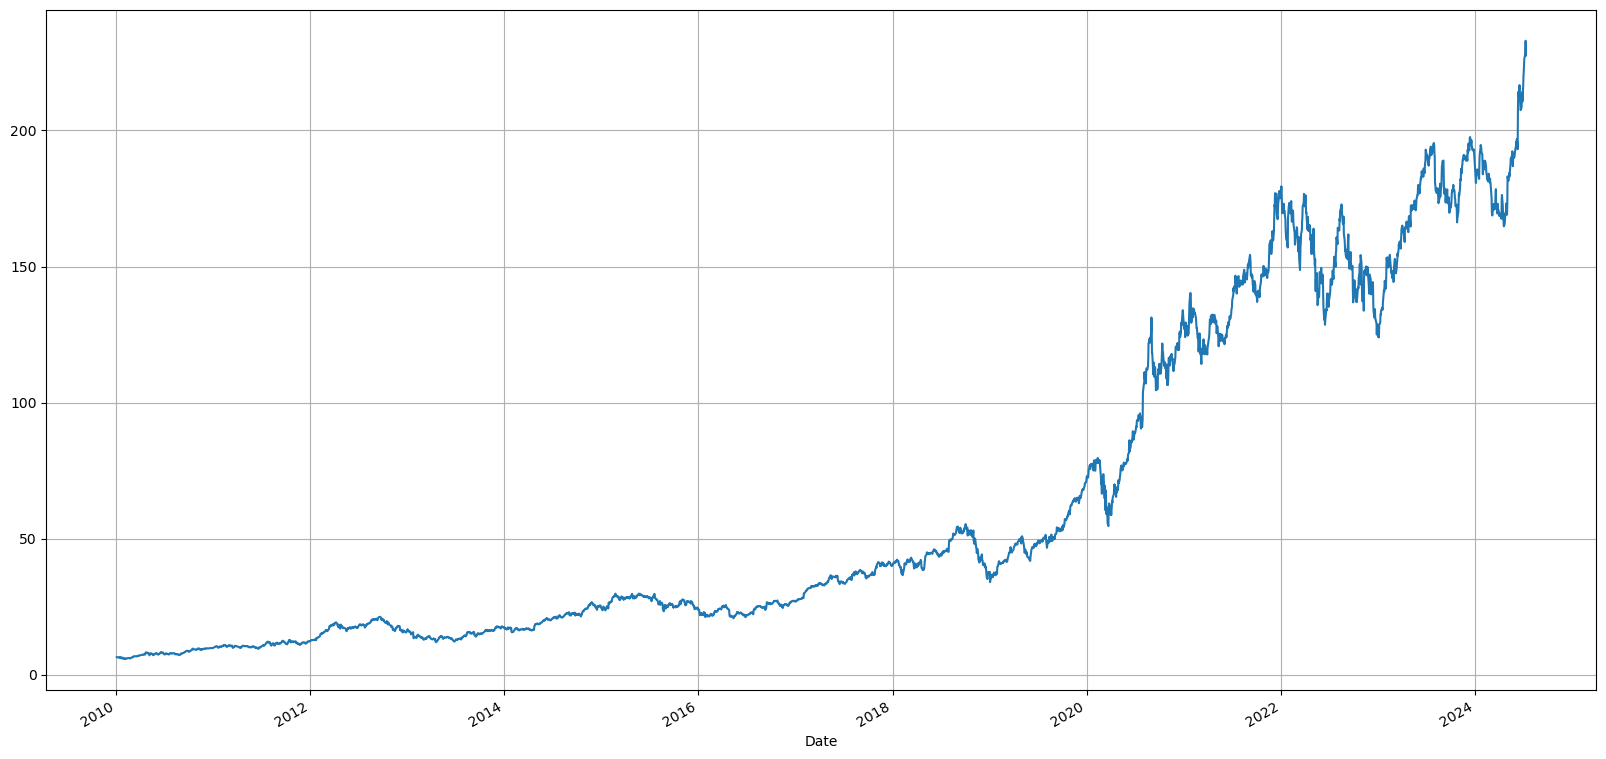

In [19]:
data_feature_selected.set_index('Date')['Adj Close'].plot(figsize=FIGURE_SIZE)

# Trasnformation

<AxesSubplot: xlabel='Date'>

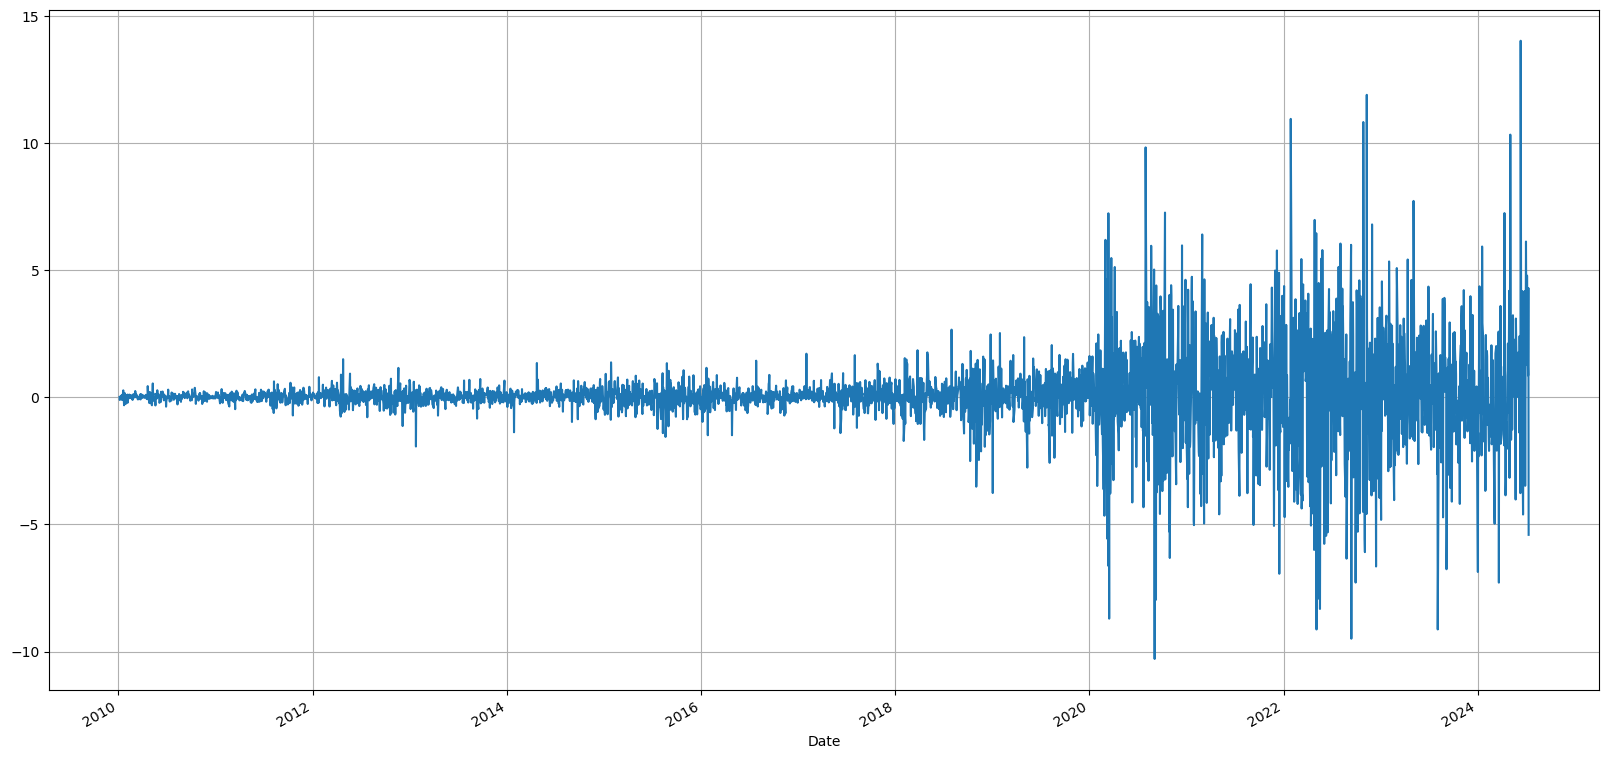

In [20]:
data_feature_selected.set_index('Date')['differenced_trasnformation_demand'].plot(figsize=FIGURE_SIZE)

<AxesSubplot: xlabel='Date'>

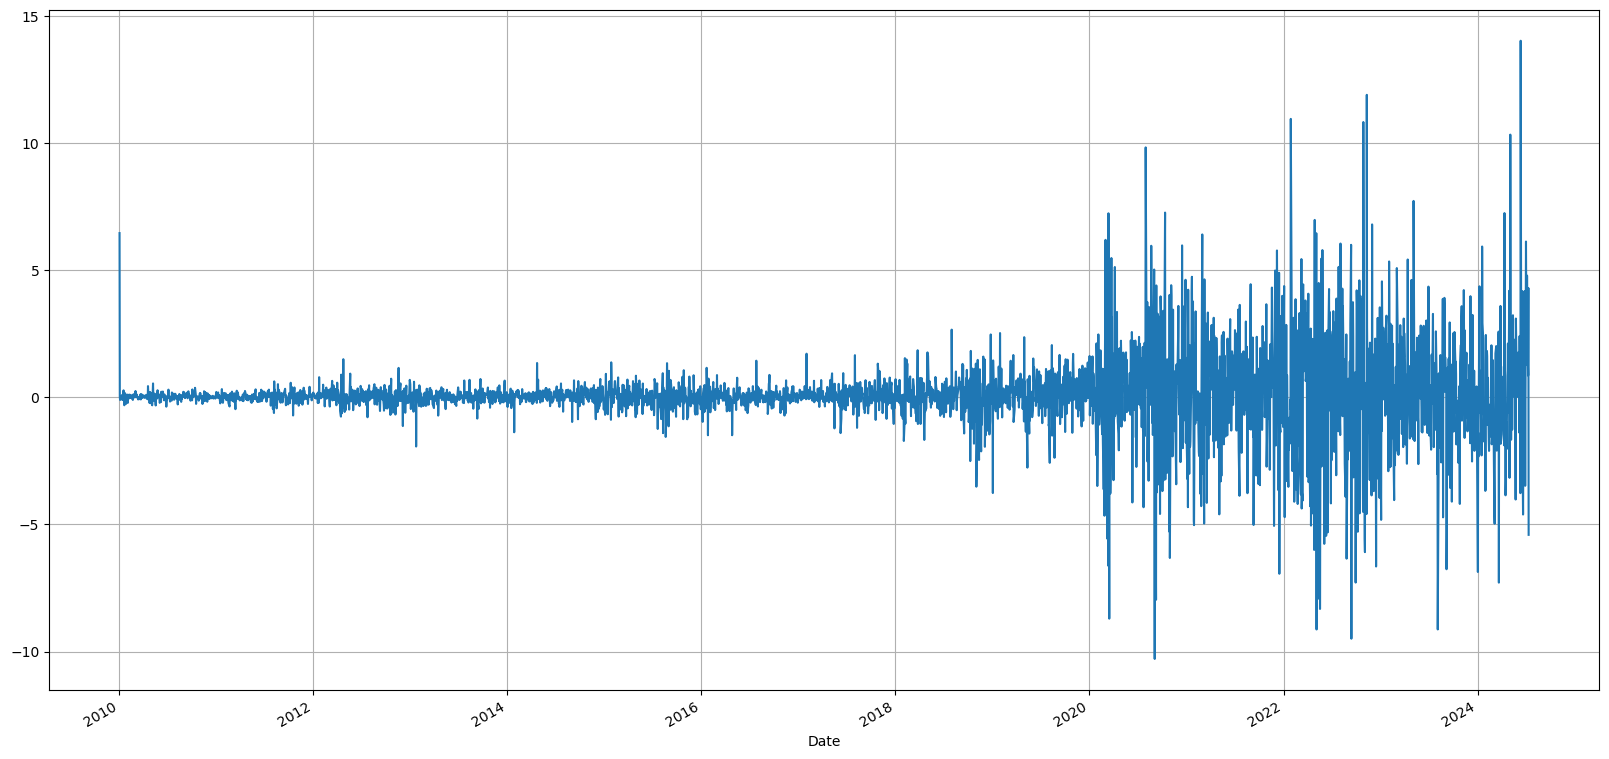

In [21]:
data_feature_selected.set_index('Date')['differenced_demand_filled'].plot(figsize=FIGURE_SIZE)

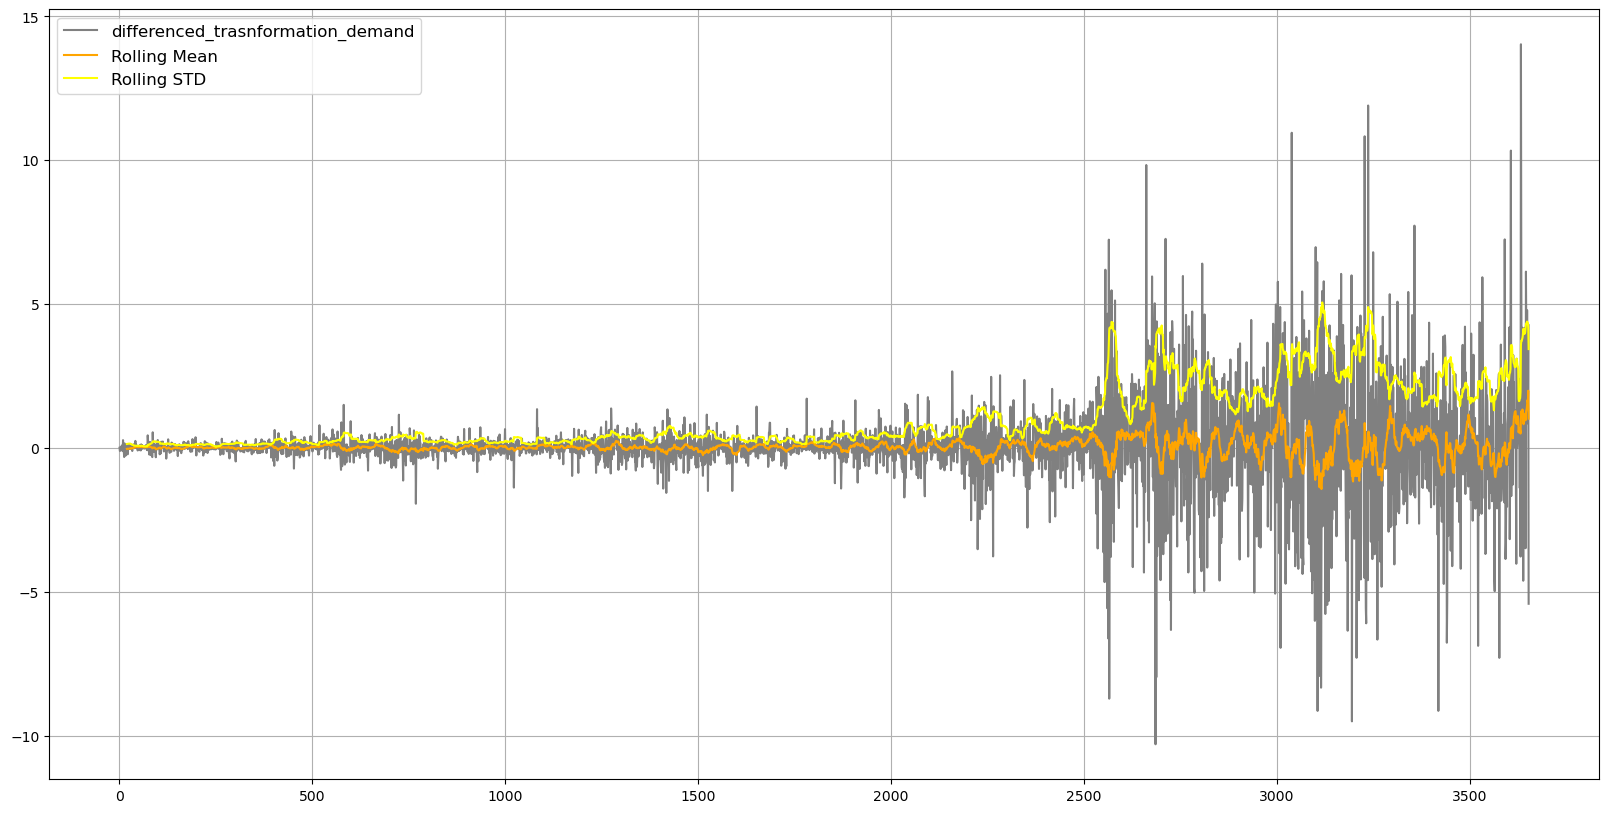

In [22]:
fig, ax = plt.subplots(figsize=(20,10))
data_feature_selected['differenced_trasnformation_demand'][1:].plot(c='grey')
data_feature_selected['differenced_trasnformation_demand'][1:].rolling(20).mean().plot(label='Rolling Mean',c='orange')
data_feature_selected['differenced_trasnformation_demand'][1:].rolling(20).std().plot(label='Rolling STD',c='yellow')
plt.legend(prop={'size': 12})

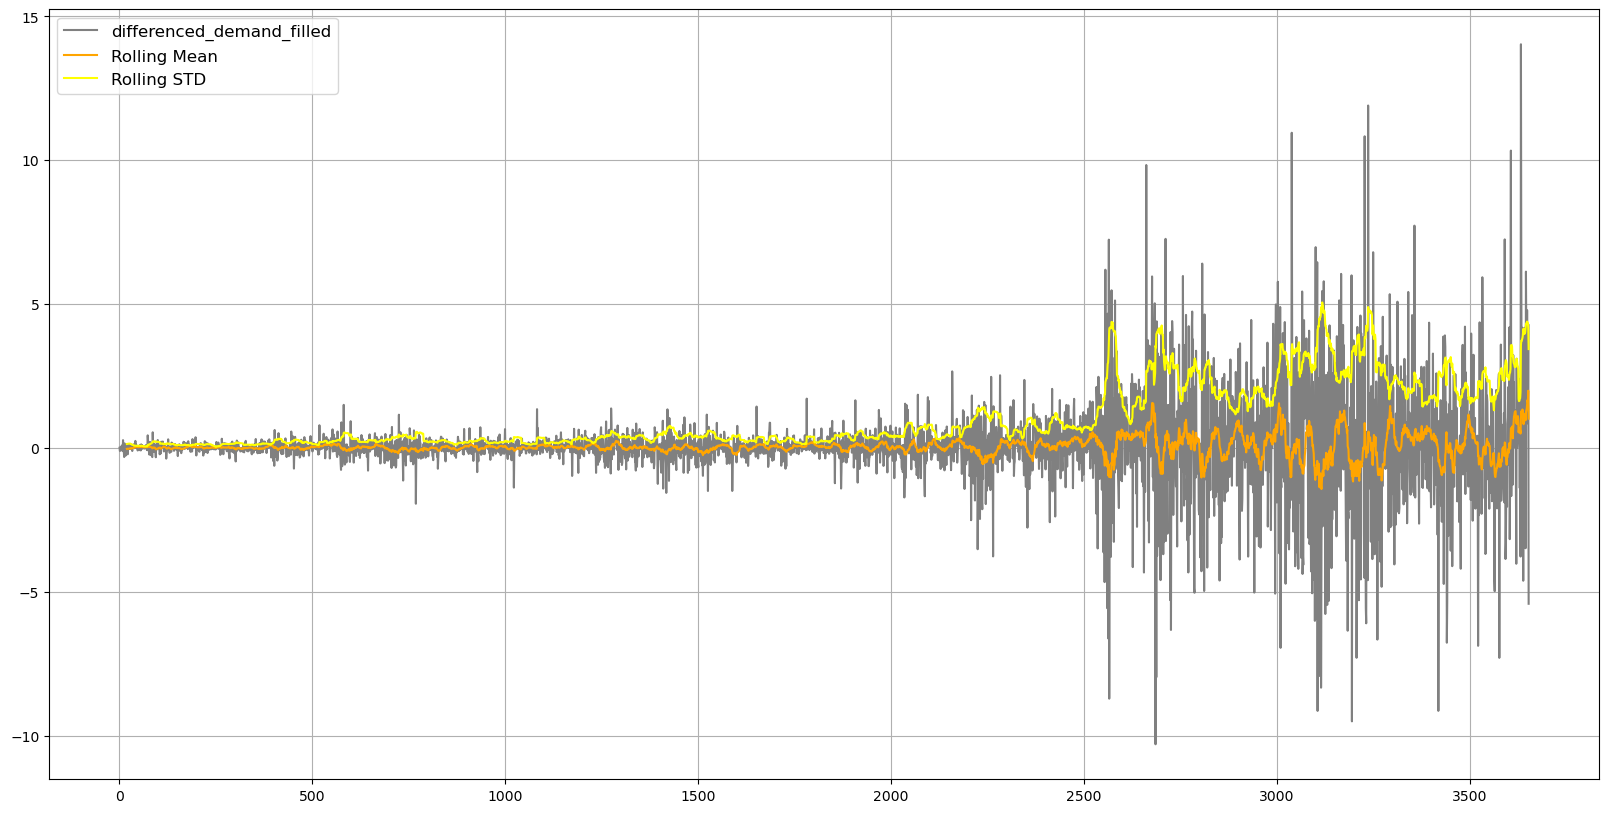

In [23]:
fig, ax = plt.subplots(figsize=(20,10))
data_feature_selected['differenced_demand_filled'][1:].plot(c='grey')
data_feature_selected['differenced_demand_filled'][1:].rolling(20).mean().plot(label='Rolling Mean',c='orange')
data_feature_selected['differenced_demand_filled'][1:].rolling(20).std().plot(label='Rolling STD',c='yellow')
plt.legend(prop={'size': 12})

Exporting data to use later as stock.csv

KPSS test , to check stationary

In [24]:

# KPSS test
from statsmodels.tsa.stattools import kpss
def kpss_test(series, **kw):
    statistic, p_value, n_lags, critical_values = kpss(series, **kw)
    # Format Output
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')

kpss_test(data_feature_selected['differenced_demand_filled'])

KPSS Statistic: 0.4385051208188128
p-value: 0.06055813757809793
num lags: 5
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


In [25]:
def build_temporal_features(data: pd.DataFrame) -> pd.DataFrame:
    # Temporal features
    data_feature_selected['date'] = pd.to_datetime(data['Date'])
    data_feature_selected['year'] = data_feature_selected['Date'].dt.year
    data_feature_selected['month'] = data_feature_selected['Date'].dt.month
    data_feature_selected['week'] = data_feature_selected['Date'].dt.day_name()
    data_feature_selected['day'] = data_feature_selected['Date'].dt.day
    data_feature_selected['dayofweek'] = data_feature_selected['Date'].dt.dayofweek
    #data['quarter'] = data['date'].dt.quarter
    data_feature_selected['week_of_month'] = data['day'].apply(lambda x: np.ceil(x / 7)).astype(np.int8)
    data_feature_selected['is_weekend'] = (data_feature_selected['dayofweek'] > 5).astype(np.int8)

    return data_feature_selected

In [26]:
build_temporal_features(data_feature_selected)

,Date,Adj Close,differenced_trasnformation_demand,differenced_demand_filled,differenced_inv_transformation_demand,date,year,month,week,day,dayofweek,week_of_month,is_weekend
0,2010-01-04,6.461978,NaN,6.461978,6.461978,2010-01-04,2010,1,Monday,4,0,1,0
1,2010-01-05,6.473150,0.011172,0.011172,6.473150,2010-01-05,2010,1,Tuesday,5,1,1,0
2,2010-01-06,6.370186,-0.102964,-0.102964,6.370186,2010-01-06,2010,1,Wednesday,6,2,1,0
3,2010-01-07,6.358408,-0.011778,-0.011778,6.358408,2010-01-07,2010,1,Thursday,7,3,1,0
4,2010-01-08,6.400682,0.042274,0.042274,6.400682,2010-01-08,2010,1,Friday,8,4,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3649,2024-07-05,226.339996,4.789993,4.789993,226.339996,2024-07-05,2024,7,Friday,5,4,1,0
3650,2024-07-08,227.820007,1.480011,1.480011,227.820007,2024-07-08,2024,7,Monday,8,0,2,0
3651,2024-07-09,228.679993,0.859986,0.859986,228.679993,2024-07-09,2024,7,Tuesday,9,1,2,0
3652,2024-07-10,232.979996,4.300003,4.300003,232.979996,2024-07-10,2024,7,Wednesday,10,2,2,0


In [27]:
data_feature_selected.to_csv("stock.csv", index=False)

In [28]:
df1 = pd.read_csv('stock.csv')

In [29]:
df1[df1.is_weekend == 1]

,Date,Adj Close,differenced_trasnformation_demand,differenced_demand_filled,differenced_inv_transformation_demand,date,year,month,week,day,dayofweek,week_of_month,is_weekend


(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
 [Text(0, 0.0, '0.0'),
  Text(0, 0.1, '0.1'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.30000000000000004, '0.3'),
  Text(0, 0.4, '0.4'),
  Text(0, 0.5, '0.5'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.7000000000000001, '0.7'),
  Text(0, 0.8, '0.8'),
  Text(0, 0.9, '0.9')])

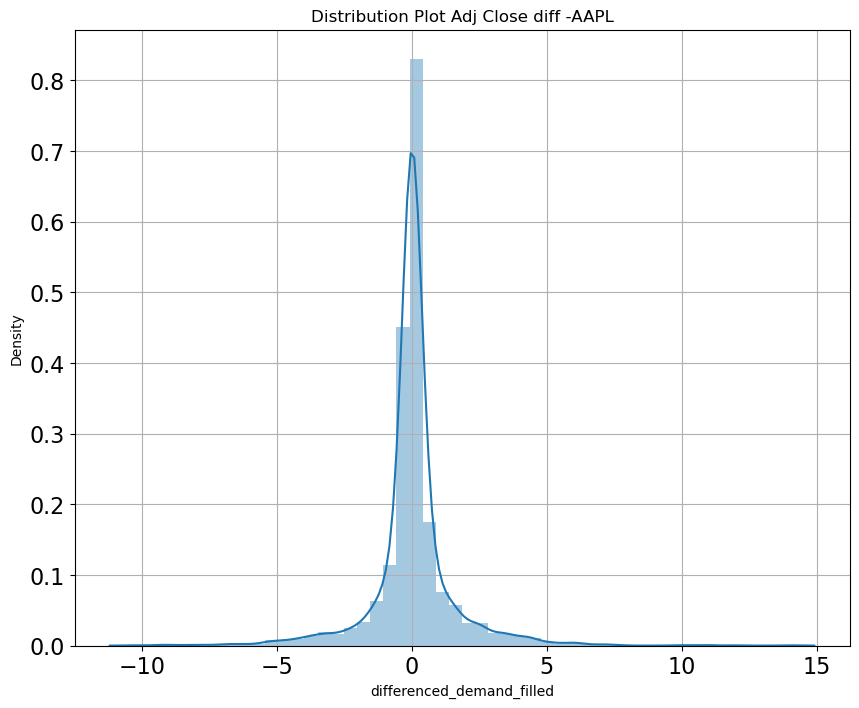

In [30]:
fig = plt.figure(figsize=(10,8))
sns.distplot(df1['differenced_demand_filled']).set_title("Distribution Plot Adj Close diff -AAPL")
#ax.tick_params(labelsize=12)
sns.set(font_scale=1)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Save old data after transformation  and load

In [31]:
df1

,Date,Adj Close,differenced_trasnformation_demand,differenced_demand_filled,differenced_inv_transformation_demand,date,year,month,week,day,dayofweek,week_of_month,is_weekend
0,2010-01-04,6.461978,NaN,6.461978,6.461978,2010-01-04,2010,1,Monday,4,0,1,0
1,2010-01-05,6.473150,0.011172,0.011172,6.473150,2010-01-05,2010,1,Tuesday,5,1,1,0
2,2010-01-06,6.370186,-0.102964,-0.102964,6.370186,2010-01-06,2010,1,Wednesday,6,2,1,0
3,2010-01-07,6.358408,-0.011778,-0.011778,6.358408,2010-01-07,2010,1,Thursday,7,3,1,0
4,2010-01-08,6.400682,0.042274,0.042274,6.400682,2010-01-08,2010,1,Friday,8,4,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3649,2024-07-05,226.339996,4.789993,4.789993,226.339996,2024-07-05,2024,7,Friday,5,4,1,0
3650,2024-07-08,227.820007,1.480011,1.480011,227.820007,2024-07-08,2024,7,Monday,8,0,2,0
3651,2024-07-09,228.679993,0.859986,0.859986,228.679993,2024-07-09,2024,7,Tuesday,9,1,2,0
3652,2024-07-10,232.979996,4.300003,4.300003,232.979996,2024-07-10,2024,7,Wednesday,10,2,2,0


Choose specific days with mask

In [32]:

mask = (df1['Date'] > '2010-01-01') & (df1['Date'] <= '2021-12-31')
print(df1.loc[mask])

            Date   Adj Close  differenced_trasnformation_demand  \
0     2010-01-04    6.461978                                NaN   
1     2010-01-05    6.473150                           0.011172   
2     2010-01-06    6.370186                          -0.102964   
3     2010-01-07    6.358408                          -0.011778   
4     2010-01-08    6.400682                           0.042274   
...          ...         ...                                ...   
3016  2021-12-27  177.824478                           3.993759   
3017  2021-12-28  176.798920                          -1.025558   
3018  2021-12-29  176.887680                           0.088760   
3019  2021-12-30  175.724045                          -1.163635   
3020  2021-12-31  175.102844                          -0.621201   

      differenced_demand_filled  differenced_inv_transformation_demand  \
0                      6.461978                               6.461978   
1                      0.011172                

In [33]:
df12=df1.loc[mask]

In [34]:
df12

,Date,Adj Close,differenced_trasnformation_demand,differenced_demand_filled,differenced_inv_transformation_demand,date,year,month,week,day,dayofweek,week_of_month,is_weekend
0,2010-01-04,6.461978,NaN,6.461978,6.461978,2010-01-04,2010,1,Monday,4,0,1,0
1,2010-01-05,6.473150,0.011172,0.011172,6.473150,2010-01-05,2010,1,Tuesday,5,1,1,0
2,2010-01-06,6.370186,-0.102964,-0.102964,6.370186,2010-01-06,2010,1,Wednesday,6,2,1,0
3,2010-01-07,6.358408,-0.011778,-0.011778,6.358408,2010-01-07,2010,1,Thursday,7,3,1,0
4,2010-01-08,6.400682,0.042274,0.042274,6.400682,2010-01-08,2010,1,Friday,8,4,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3016,2021-12-27,177.824478,3.993759,3.993759,177.824478,2021-12-27,2021,12,Monday,27,0,4,0
3017,2021-12-28,176.798920,-1.025558,-1.025558,176.798920,2021-12-28,2021,12,Tuesday,28,1,4,0
3018,2021-12-29,176.887680,0.088760,0.088760,176.887680,2021-12-29,2021,12,Wednesday,29,2,5,0
3019,2021-12-30,175.724045,-1.163635,-1.163635,175.724045,2021-12-30,2021,12,Thursday,30,3,5,0


In [35]:
#X=  df12[['Date']]
#y= df12['differenced_demand_filled']


selecting y as ['Adj Close']

In [36]:
y = df1['Adj Close']

In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
y=scaler.fit_transform(np.array(y).reshape(-1,1))

In [93]:
##splitting dataset into train and test split
training_size=int(len(y)*0.65)
test_size=len(y)-training_size
train_data,test_data=y[0:training_size,:],y[training_size:len(y),:1]

In [94]:
training_size,test_size

(2375, 1279)

In [95]:
train_data[2]

array([0.00251466])

In [96]:
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [97]:
import numpy

In [98]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [99]:
print(X_train.shape), print(y_train.shape)

(2274, 100)
(2274,)


(None, None)

In [100]:
print(X_test.shape), print(ytest.shape)

(1178, 100)
(1178,)


(None, None)

In [101]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [102]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout ,BatchNormalization
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.initializers import RandomNormal, Constant


# Tunning LSTM

In [103]:

# # Build the LSTM Stack model
model=Sequential()
# Adding first LSTM layer
model.add(LSTM(150,return_sequences=True,input_shape=(100,1)))
model.add(Dropout(0.2)) # Dropout regularisation
# second LSTM layer
model.add(LSTM(150,return_sequences=True))
# Adding third LSTM layer
model.add(LSTM(150, return_sequences=True))
model.add(Dropout(0.2))
# Adding fourth LSTM layer
model.add(LSTM(150))
model.add(Dropout(0.2))
# Adding the Output Layer
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')




In [104]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 100, 150)       │        91,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 100, 150)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 100, 150)       │       180,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 100, 150)       │       180,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 100, 150)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 150)            │       180,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 150)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           151 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 633,151 (2.42 MB)

 Trainable params: 633,151 (2.42 MB)

 Non-trainable params: 0 (0.00 B)

In [105]:
#history= model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=54,batch_size=64,verbose=1)

EarlyStopping


In [106]:
from tensorflow.keras.callbacks import EarlyStopping


In [107]:
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=30,
        verbose=1, mode='auto', restore_best_weights=True)

history=model.fit(X_train,y_train,validation_data=(X_test,ytest),
        callbacks=[monitor],verbose=1,epochs=100)

Epoch 1/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 52s 575ms/step - loss: 0.0015 - val_loss: 0.0023
Epoch 2/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 53s 733ms/step - loss: 9.4515e-05 - val_loss: 0.0060
Epoch 3/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 51s 715ms/step - loss: 7.5493e-05 - val_loss: 0.0066
Epoch 4/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 56s 781ms/step - loss: 6.9761e-05 - val_loss: 0.0094
Epoch 5/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 50s 698ms/step - loss: 7.0779e-05 - val_loss: 0.0062
Epoch 6/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 48s 670ms/step - loss: 6.7834e-05 - val_loss: 0.0066
Epoch 7/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 53s 733ms/step - loss: 9.6841e-05 - val_loss: 0.0219
Epoch 8/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 51s 714ms/step - loss: 1.8334e-04 - val_loss: 0.0039
Epoch 9/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 56s 782ms/step - loss: 5.4130e-05 - val_loss: 0.0025
Epoch 10/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 53s 736ms/step - loss: 5.1841e-05 - val_loss: 0.0019
Epoch 11/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 55s 763ms/step - loss: 4.4156e-05 - val_los

***Running each time might change results***

 to avoid
*   set seed
*   save weights of the model or save the whole model

>











In [54]:
model.save("lstm2022.h5") #save model
#new_model = tf.keras.models.load_model('my_model.h5')

# Show the model architecture
#new_model.summary()

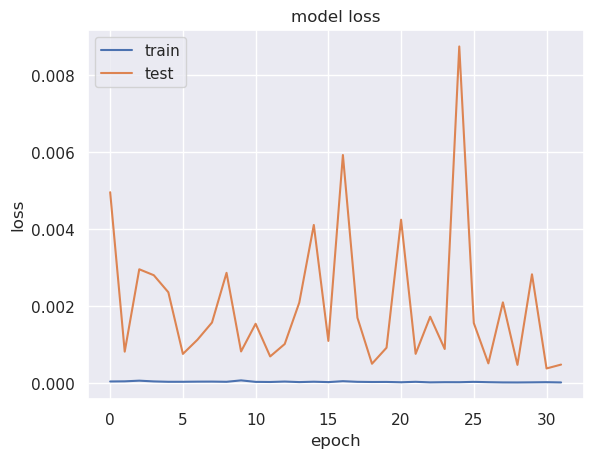

In [55]:
plt.plot(history.history['loss']) # tb
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

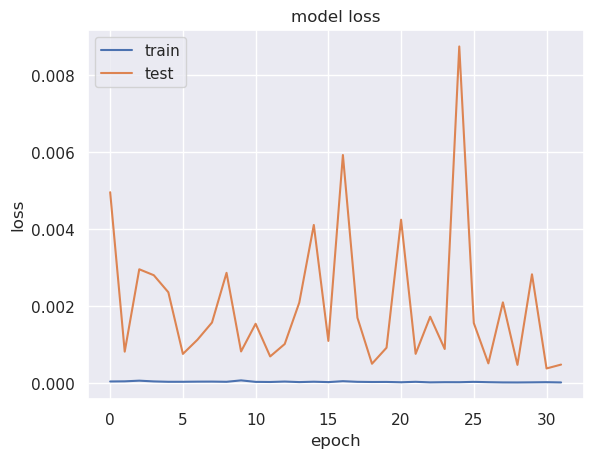

In [56]:
plt.plot(history.history['loss']) # t
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

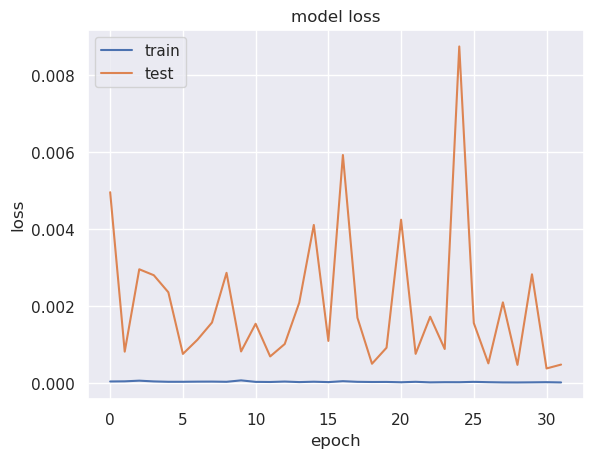

In [57]:
plt.plot(history.history['loss']) # tn
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

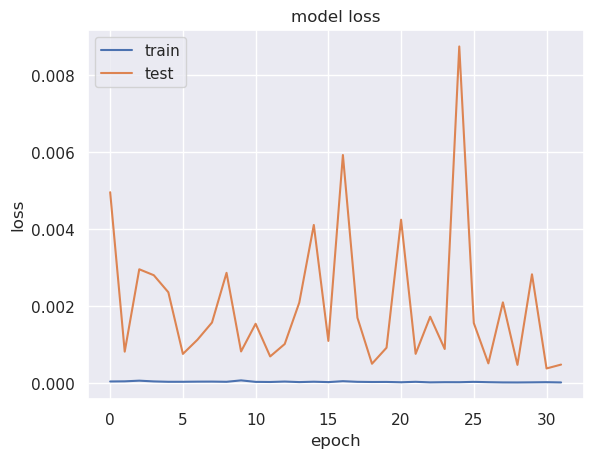

In [58]:
plt.plot(history.history['loss']) # t
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

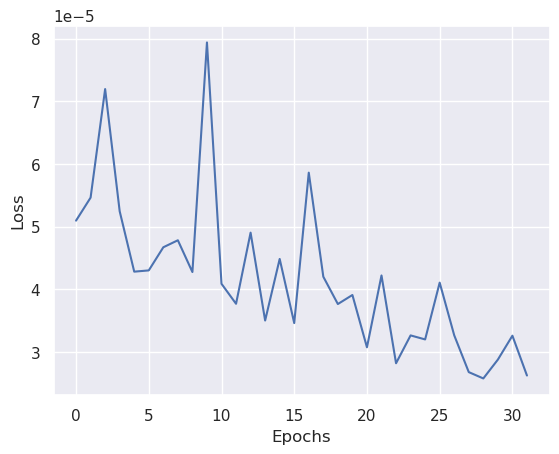

In [59]:
plt.plot(history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

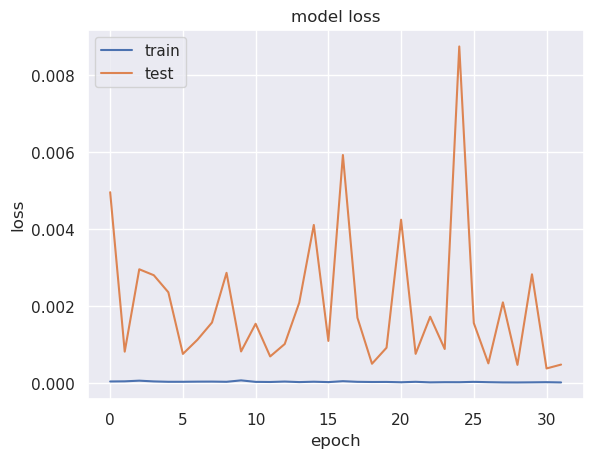

In [60]:
plt.plot(history.history['loss']) # t
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

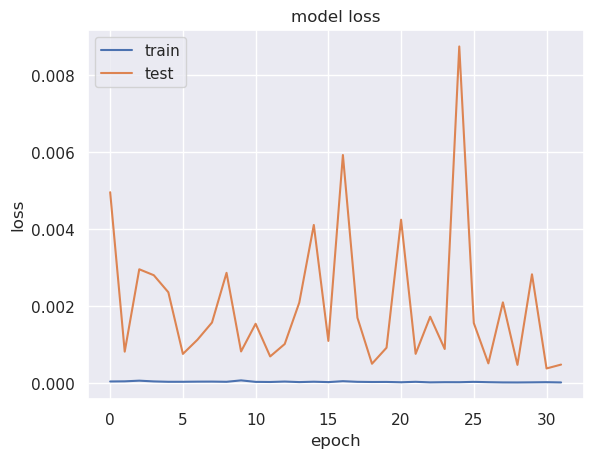

In [61]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [62]:
import tensorflow as tf

In [63]:
tf.__version__

'2.16.1'

In [64]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

72/72 ━━━━━━━━━━━━━━━━━━━━ 25s 325ms/step
37/37 ━━━━━━━━━━━━━━━━━━━━ 8s 224ms/step


In [65]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [66]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

27.18405507890917

In [67]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(ytest, test_predict)

142.9857181753959

In [68]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_train, train_predict)

23.693153646671217

In [69]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(ytest, test_predict)

142.9857181753959

In [70]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

27.18405507890917

In [71]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

147.3509278245253

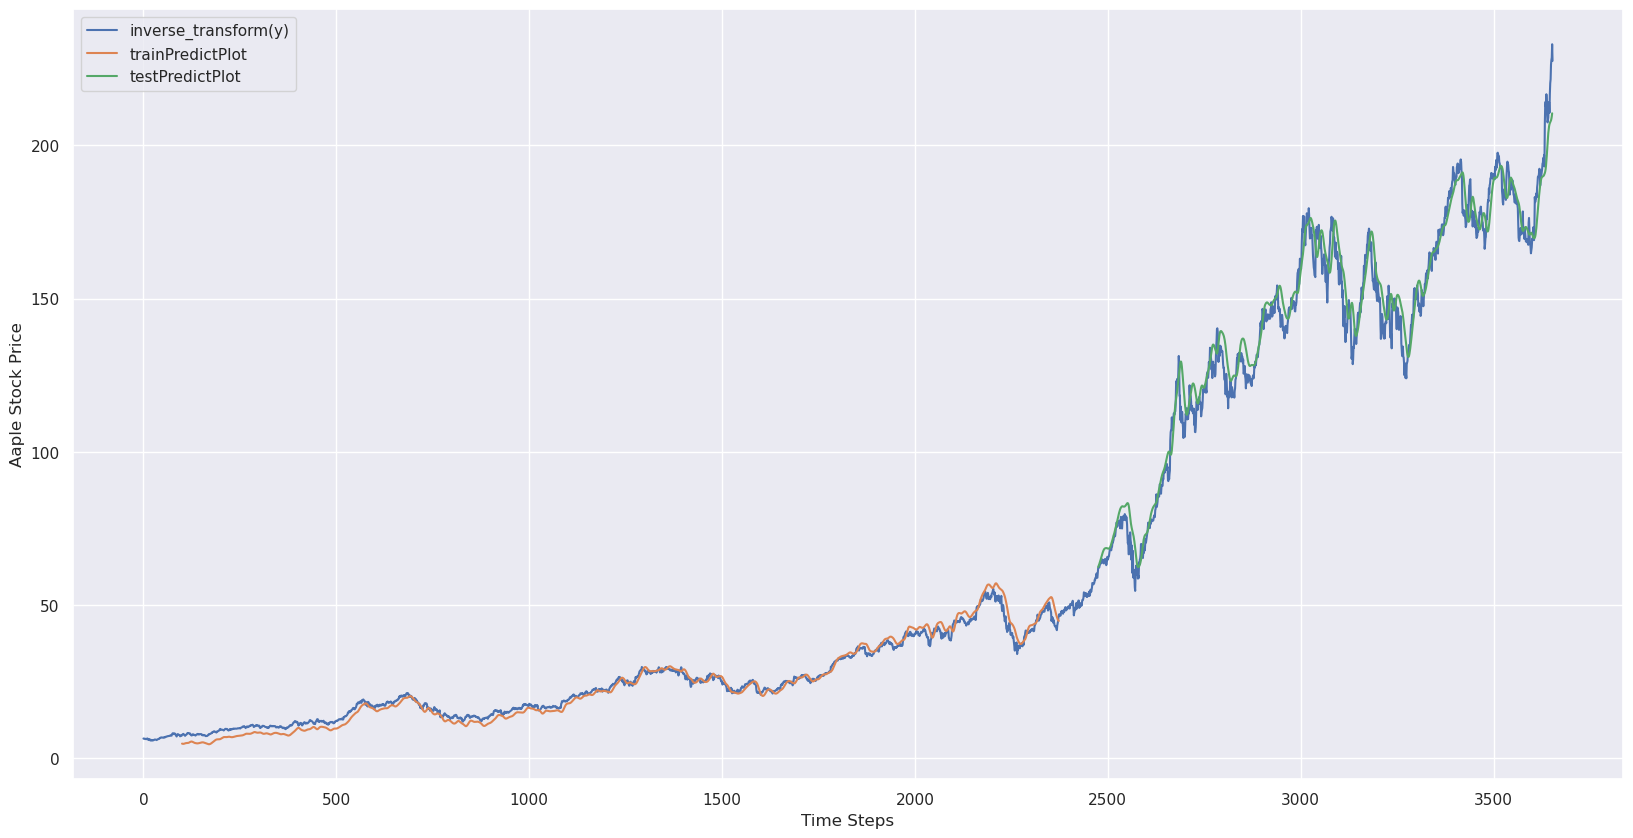

In [72]:
### Plotting
# shift train predictions for plotting
look_back=100
fig, ax = plt.subplots(figsize=(20,10))
trainPredictPlot = numpy.empty_like(y)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(y)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(y)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(y))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(['inverse_transform(y)','trainPredictPlot','testPredictPlot'])
plt.xlabel('Time Steps')
plt.ylabel('Aaple Stock Price')
plt.show()

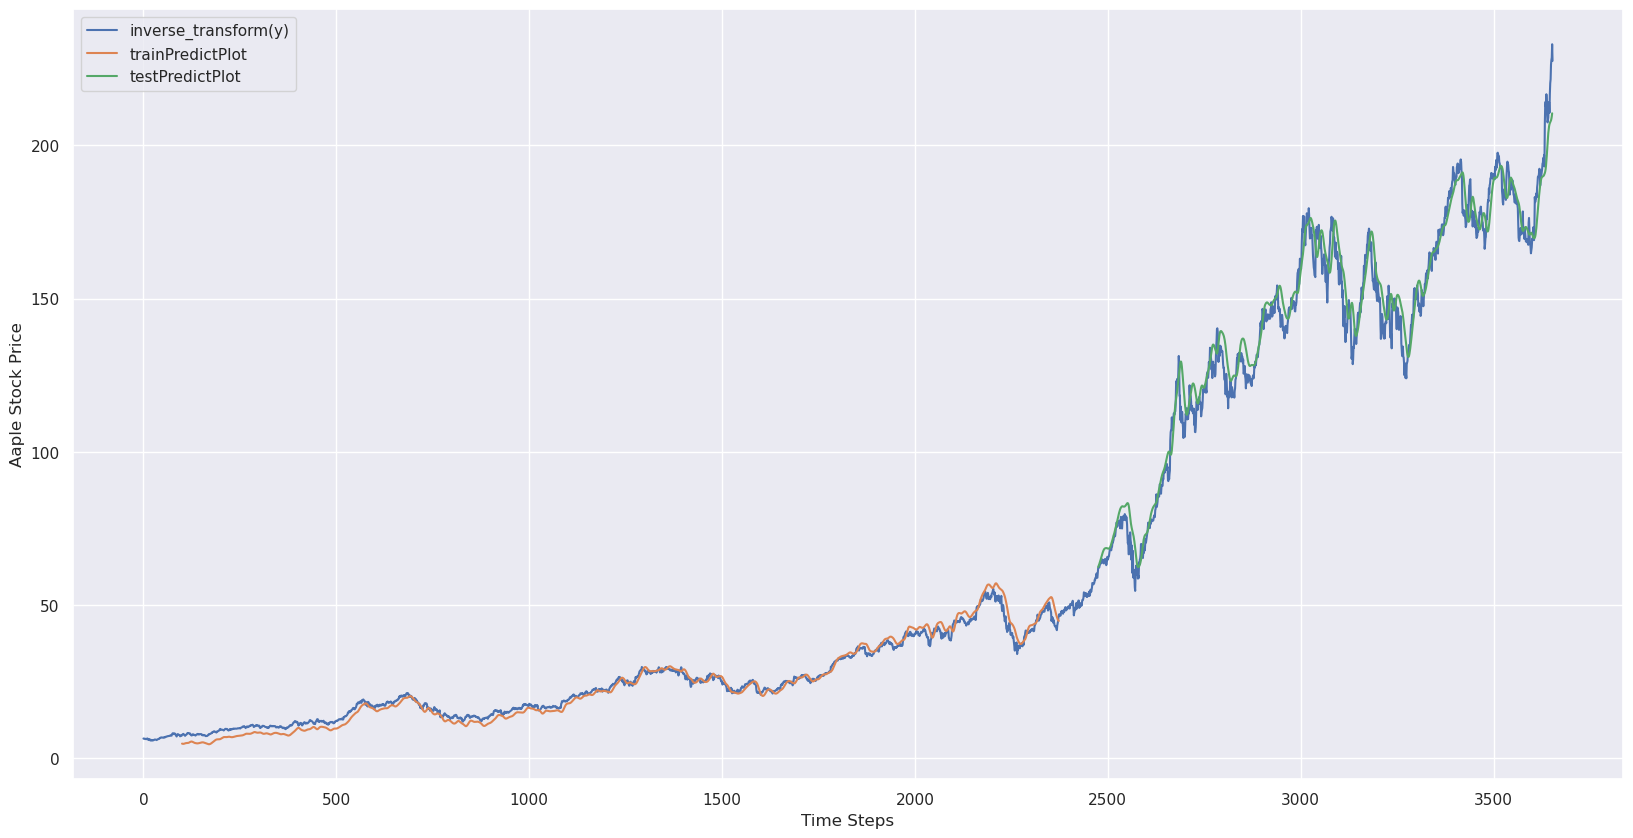

In [73]:
## Plotting
# shift train predictions for plotting
look_back=100
fig, ax = plt.subplots(figsize=(20,10))
trainPredictPlot = numpy.empty_like(y)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(y)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(y)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(y))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(['inverse_transform(y)','trainPredictPlot','testPredictPlot'])
plt.xlabel('Time Steps')
plt.ylabel('Aaple Stock Price')
plt.show()

In [74]:
# evaluate the model
train_mse = model.evaluate(X_train, y_train, verbose=1)
test_mse = model.evaluate(X_test, ytest, verbose=1)


72/72 ━━━━━━━━━━━━━━━━━━━━ 15s 201ms/step - loss: 8.2630e-05
37/37 ━━━━━━━━━━━━━━━━━━━━ 7s 181ms/step - loss: 6.9591e-04


In [75]:
train_mse > test_mse

False

- Underfitting – Validation and training error high
- Overfitting – Validation error is high, training error low
- Good fit – Validation error low, slightly higher than the training error
- Unknown fit - Validation error low, training error 'high'


In [76]:
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))

Train: 0.000, Test: 0.001


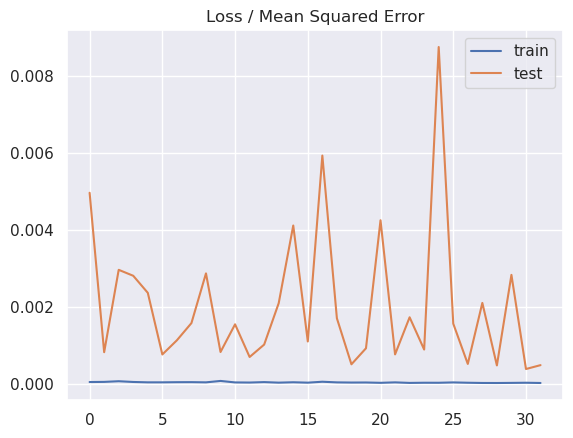

In [77]:
# plot loss during training
plt.title('Loss / Mean Squared Error')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()


If validation loss >> training loss you can call it overfitting.
If validation loss  > training loss you can call it some overfitting.
If validation loss  < training loss you can call it some underfitting.
If validation loss << training loss you can call it underfitting.

# Future forecasting

In [92]:
len(test_data), len(train_data) # 2024-07-12 test-data last date

(1279, 2375)

In [79]:
x_input=test_data[943:].reshape(1,-1)
x_input.shape

(1, 336)

In [80]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [81]:
temp_input

[0.62378682356376,
 0.6324005597050254,
 0.6416703099422525,
 0.6434192362855686,
 0.655924559461801,
 0.6522079429725786,
 0.6627018531744547,
 0.6709221366809687,
 0.6645820228332908,
 0.6693917628550551,
 0.6751635195488582,
 0.6665496425508013,
 0.6637949062786008,
 0.6774370802175995,
 0.6843894061008439,
 0.6954953962850448,
 0.7010484596046536,
 0.6986873828506169,
 0.6905108265743275,
 0.6944460660093484,
 0.6829464163069836,
 0.6775683191313445,
 0.6745075758812922,
 0.6983812394177484,
 0.6968510020468517,
 0.6969383860789049,
 0.7023602721096148,
 0.7074322962807812,
 0.7031472566110628,
 0.6960201626637118,
 0.6973756363722766,
 0.6905545494027774,
 0.6905108265743275,
 0.7108428397655309,
 0.7163958326567438,
 0.7160023756202177,
 0.7114111969194057,
 0.7066452457527121,
 0.6993869128916158,
 0.7334048888768886,
 0.733098679417399,
 0.725534405605072,
 0.733361029593422,
 0.7341918689765619,
 0.7300760863489811,
 0.7278868196664287,
 0.7278868196664287,
 0.730601455770787,

In [84]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output = []
n_steps = 335
i = 0
while (i < 30):

    if len(temp_input) >= n_steps + 1:  # Check for sufficient elements
        x_input = np.array(temp_input[1:]).reshape((1, n_steps, 1))
        print("{} day input {}".format(i, x_input))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]  # Update temp_input after prediction
        lst_output.extend(yhat.tolist())
        i = i + 1
    else:
        # Handle short inputs (optional)
        # ... (padding logic or error handling)
        i = i + 1  # Skip prediction if input is too short

print(lst_output)


0 day input [[[0.63240056]
  [0.64167031]
  [0.64341924]
  [0.65592456]
  [0.65220794]
  [0.66270185]
  [0.67092214]
  [0.66458202]
  [0.66939176]
  [0.67516352]
  [0.66654964]
  [0.66379491]
  [0.67743708]
  [0.68438941]
  [0.6954954 ]
  [0.70104846]
  [0.69868738]
  [0.69051083]
  [0.69444607]
  [0.68294642]
  [0.67756832]
  [0.67450758]
  [0.69838124]
  [0.696851  ]
  [0.69693839]
  [0.70236027]
  [0.7074323 ]
  [0.70314726]
  [0.69602016]
  [0.69737564]
  [0.69055455]
  [0.69051083]
  [0.71084284]
  [0.71639583]
  [0.71600238]
  [0.7114112 ]
  [0.70664525]
  [0.69938691]
  [0.73340489]
  [0.73309868]
  [0.72553441]
  [0.73336103]
  [0.73419187]
  [0.73007609]
  [0.72788682]
  [0.72788682]
  [0.73060146]
  [0.74093471]
  [0.74141642]
  [0.73721292]
  [0.72565363]
  [0.72687967]
  [0.73191509]
  [0.74259847]
  [0.75078638]
  [0.75056748]
  [0.76300248]
  [0.766768  ]
  [0.76076936]
  [0.75914939]
  [0.75306323]
  [0.76510417]
  [0.76681179]
  [0.77920293]
  [0.77710132]
  [0.7799036 

In [108]:
day_new=np.arange(1,336)
day_pred=np.arange(336,366)

In [109]:
import matplotlib.pyplot as plt

In [110]:
len(y)

3654

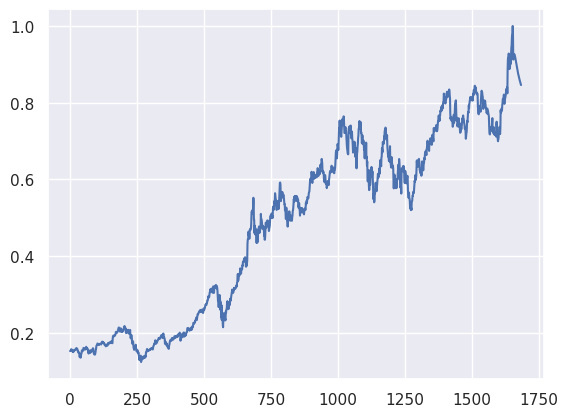

In [111]:
df3=y.tolist()
df3.extend(lst_output)
plt.plot(df3[2000:])


<AxesSubplot: xlabel='Date'>

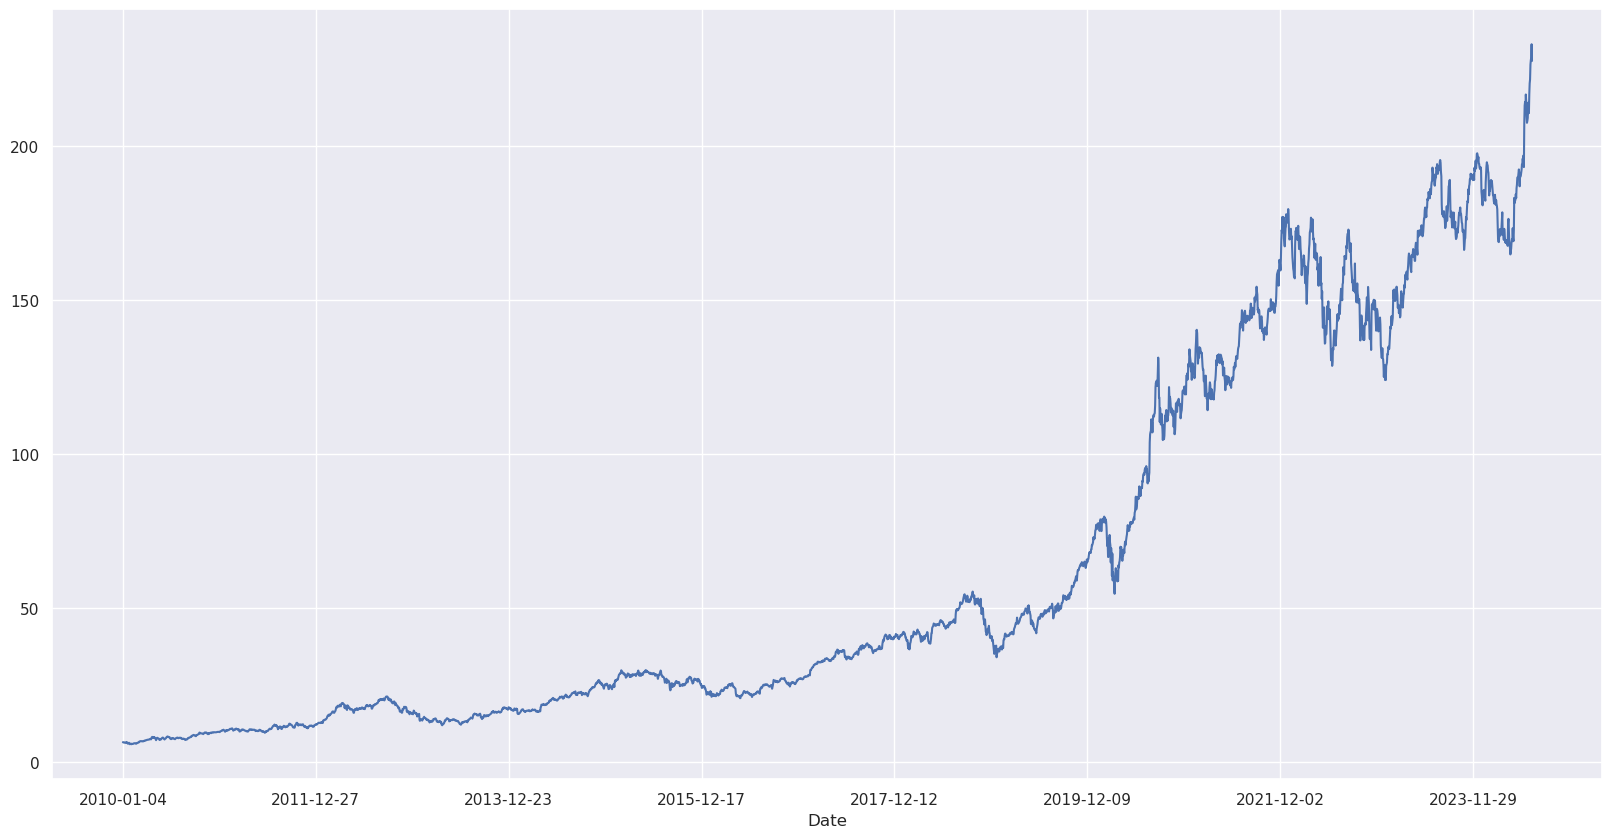

In [112]:
df1.set_index('Date')['Adj Close'].plot(figsize=FIGURE_SIZE)

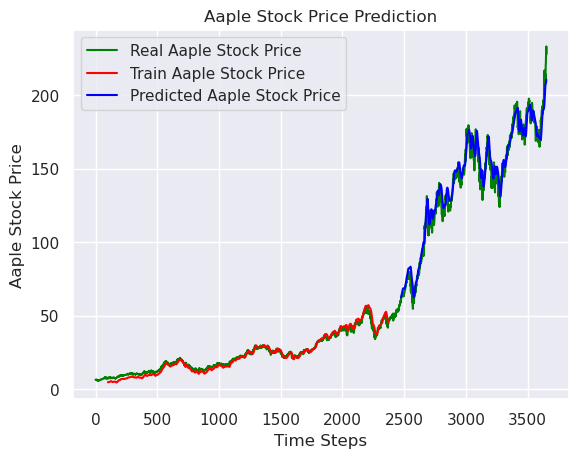

In [ ]:
# Visualising the results. with details

plt.plot(scaler.inverse_transform(y), color='Green', label='Real Apple Stock Price')
plt.plot(trainPredictPlot, color='Red', label='Train Apple Stock Price')
plt.plot(testPredictPlot, color='Blue', label='Predicted Apple Stock Price')

plt.title('Aaple Stock Price Prediction')
plt.xlabel('Time Steps')
plt.ylabel('Aaple Stock Price')
plt.legend()
plt.show()

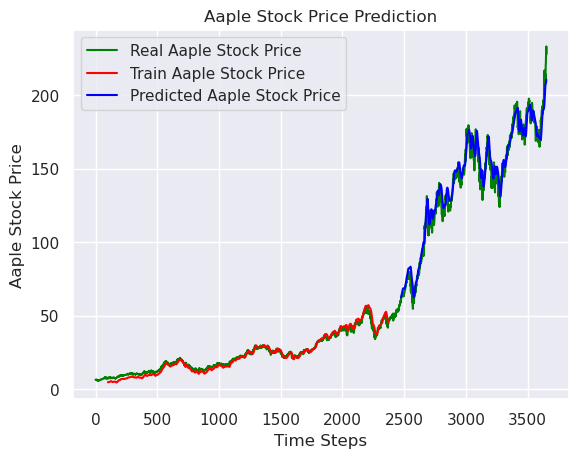

In [ ]:
# Visualising the results.

plt.plot(scaler.inverse_transform(y), color='Green', label='Real Apple Stock Price')
plt.plot(trainPredictPlot, color='Red', label='Train Apple Stock Price')
plt.plot(testPredictPlot, color='Blue', label='Predicted Apple Stock Price')

plt.title('Aaple Stock Price Prediction')
plt.xlabel('Time Steps')
plt.ylabel('Aaple Stock Price')
plt.legend()
plt.show()

# Bidirectional LSTM

In [115]:
from random import random
from numpy import array
from numpy import cumsum
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import TimeDistributed
from keras.layers import Bidirectional


In [116]:
tf.random.set_seed(1234)

In [117]:

modell = Sequential()
modell.add(Bidirectional(LSTM(100, activation='relu', input_shape=(100,1)))) #elu
#modell.add(Bidirectional(LSTM(50, dropout=0.5)))

#modell.add(Bidirectional(LSTM(100, dropout=0.5)))
#modell.add(BatchNormalization(momentum=0.6))
modell.add(Dense(1))
modell.compile(loss='mean_squared_error', optimizer='adam') #rmsprop adam




In [118]:
from tensorflow.keras.callbacks import EarlyStopping

In [119]:
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=30,
        verbose=1, mode='auto', restore_best_weights=True)

history1=modell.fit(X_train,y_train,validation_data=(X_test,ytest),
        callbacks=[monitor],verbose=1,epochs=1000)

Epoch 1/1000
72/72 ━━━━━━━━━━━━━━━━━━━━ 20s 161ms/step - loss: 0.0021 - val_loss: 0.0022
Epoch 2/1000
72/72 ━━━━━━━━━━━━━━━━━━━━ 11s 146ms/step - loss: 5.7078e-05 - val_loss: 0.0015
Epoch 3/1000
72/72 ━━━━━━━━━━━━━━━━━━━━ 10s 144ms/step - loss: 3.8947e-05 - val_loss: 0.0014
Epoch 4/1000
72/72 ━━━━━━━━━━━━━━━━━━━━ 11s 157ms/step - loss: 3.3129e-05 - val_loss: 0.0013
Epoch 5/1000
72/72 ━━━━━━━━━━━━━━━━━━━━ 12s 162ms/step - loss: 2.6371e-05 - val_loss: 0.0012
Epoch 6/1000
72/72 ━━━━━━━━━━━━━━━━━━━━ 11s 157ms/step - loss: 2.2714e-05 - val_loss: 0.0011
Epoch 7/1000
72/72 ━━━━━━━━━━━━━━━━━━━━ 11s 157ms/step - loss: 2.0817e-05 - val_loss: 9.4044e-04
Epoch 8/1000
72/72 ━━━━━━━━━━━━━━━━━━━━ 11s 158ms/step - loss: 1.9238e-05 - val_loss: 8.5992e-04
Epoch 9/1000
72/72 ━━━━━━━━━━━━━━━━━━━━ 11s 146ms/step - loss: 1.7755e-05 - val_loss: 7.9738e-04
Epoch 10/1000
72/72 ━━━━━━━━━━━━━━━━━━━━ 11s 151ms/step - loss: 1.6500e-05 - val_loss: 7.5043e-04
Epoch 11/1000
72/72 ━━━━━━━━━━━━━━━━━━━━ 10s 135ms/step -

In [120]:
modell.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 200)            │        81,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           201 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 245,405 (958.62 KB)

 Trainable params: 81,801 (319.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 163,604 (639.08 KB)

***Running each time might change results***

*   List item
*   List item

> Indented block





In [121]:
modell.save("my_del.h5") #save model
#new_model = tf.keras.models.load_model('my_model.h5')

# Show the model architecture
#new_model.summary()

In [124]:
modell.save_weights('myfalse_weights.weights.h5')


In [125]:
plot_1(history1, 'Training / Validation Losses from History')

NameError: name 'plot_1' is not defined

In [126]:
plot_1(history1, 'Training / Validation Losses from History')

NameError: name 'plot_1' is not defined

In [ ]:
plot_1(history1, 'Training / Validation Losses from History')

In [ ]:
plot_1(history1, 'Training / Validation Losses from History')

In [ ]:
plot_1(history1, 'Training / Validation Losses from History')

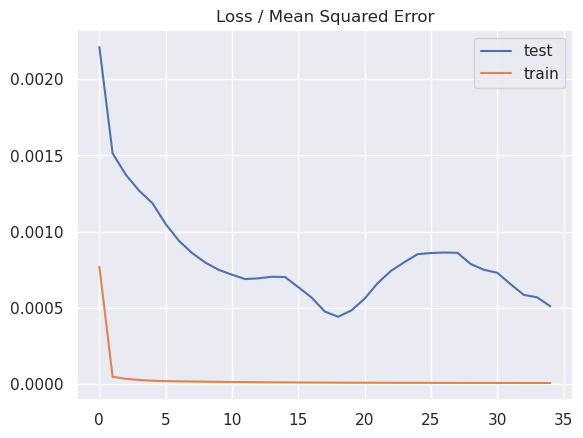

In [127]:
pyplot.title('Loss / Mean Squared Error')
pyplot.plot(history1.history['val_loss'], label='test')
pyplot.plot(history1.history['loss'], label='train')
pyplot.legend()
pyplot.show()

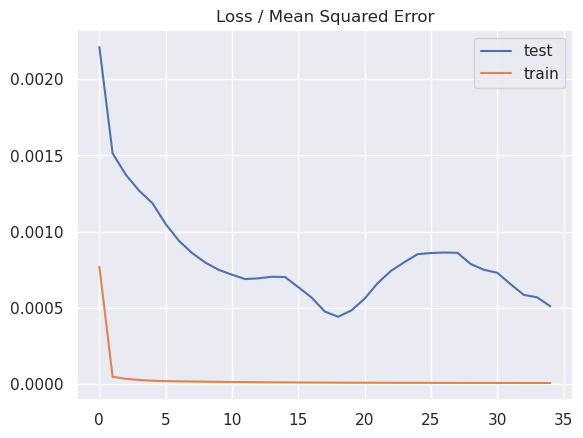

In [128]:
pyplot.title('Loss / Mean Squared Error')
pyplot.plot(history1.history['val_loss'], label='test')
pyplot.plot(history1.history['loss'], label='train')
pyplot.legend()
pyplot.show()

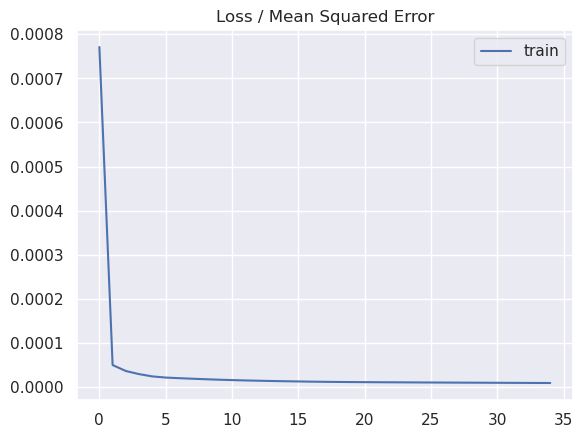

In [129]:
pyplot.title('Loss / Mean Squared Error')
#pyplot.plot(history1.history['val_loss'], label='test')
pyplot.plot(history1.history['loss'], label='train')
pyplot.legend()
pyplot.show()

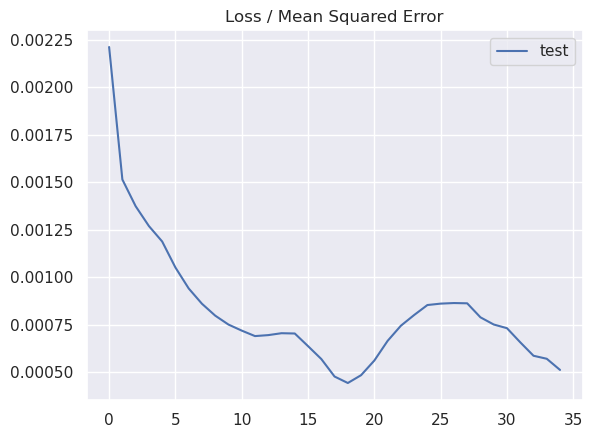

In [130]:
pyplot.title('Loss / Mean Squared Error')
pyplot.plot(history1.history['val_loss'], label='test')
#pyplot.plot(history1.history['loss'], label='train')
pyplot.legend()
pyplot.show()

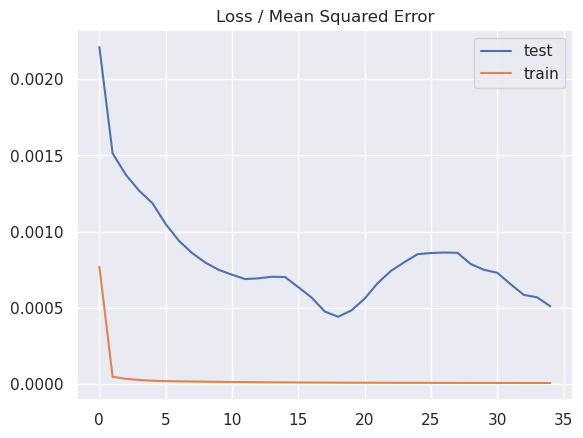

In [131]:
pyplot.title('Loss / Mean Squared Error')
pyplot.plot(history1.history['val_loss'], label='test')
pyplot.plot(history1.history['loss'], label='train')
pyplot.legend()
pyplot.show()

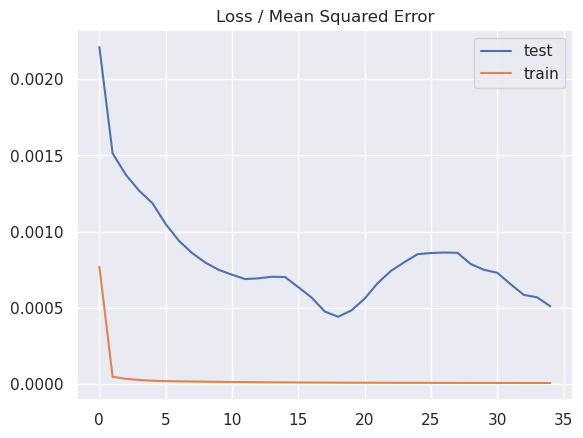

In [132]:
pyplot.title('Loss / Mean Squared Error')
pyplot.plot(history1.history['val_loss'], label='test')
pyplot.plot(history1.history['loss'], label='train')
pyplot.legend()
pyplot.show()

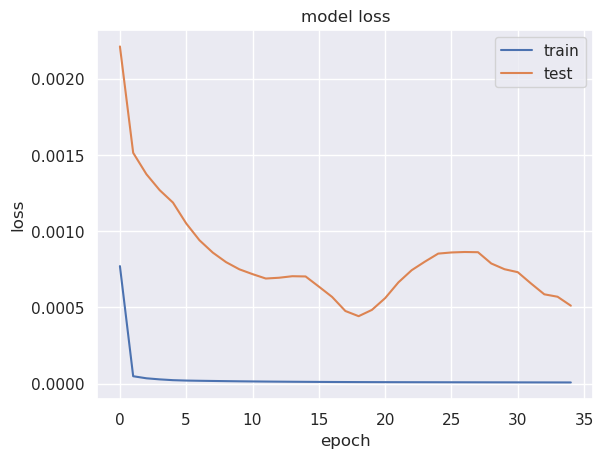

In [133]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'],loc='upper right')
plt.show()

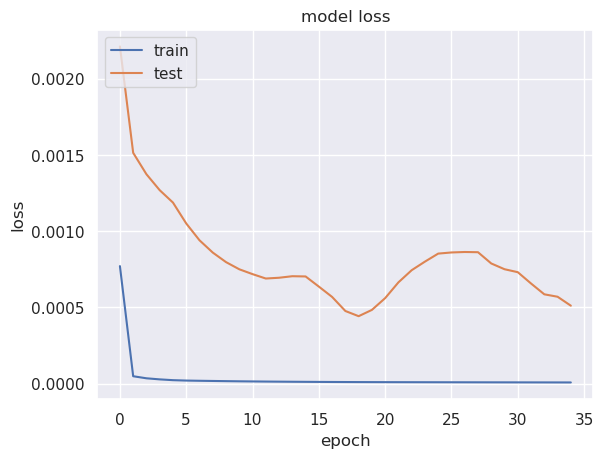

In [134]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

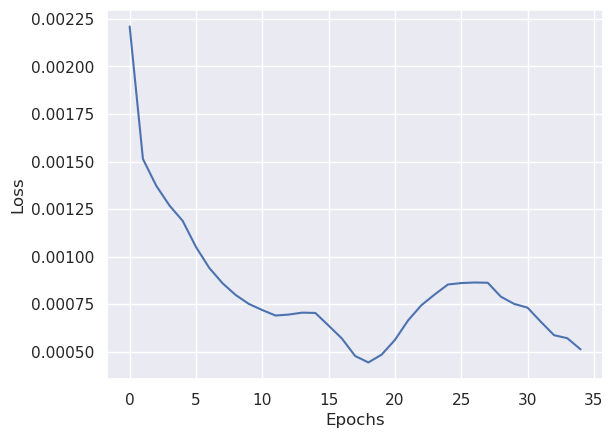

In [135]:
plt.plot(history1.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

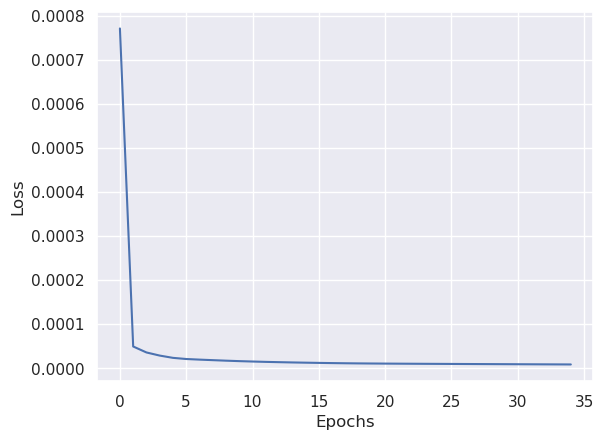

In [136]:
plt.plot(history1.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [138]:
train_predict=modell.predict(X_train)
test_predict=modell.predict(X_test)

72/72 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step


In [139]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [140]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

146.56927491075103

In [141]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

25.945618042077633

In [142]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

146.56927491075103

In [143]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

25.945618042077633

In [144]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

146.56927491075103

In [145]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

25.945618042077633

In [146]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

146.56927491075103

In [147]:
# create the list of difference between prediction and test data
predictions = modell.predict(X_test)
len(predictions)

37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step


1178

In [148]:
def plot_1(history, title):
  """function that plots the loss results of the model"""
  plt.figure(figsize=(8,6))
  plt.plot(history1.history['loss'], 'o-', mfc='none', markersize=10,
  label='Train')
  plt.plot(history1.history['val_loss'], 'o-', mfc='none',
  markersize=10, label='Valid')
  plt.title('LSTM Model Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()


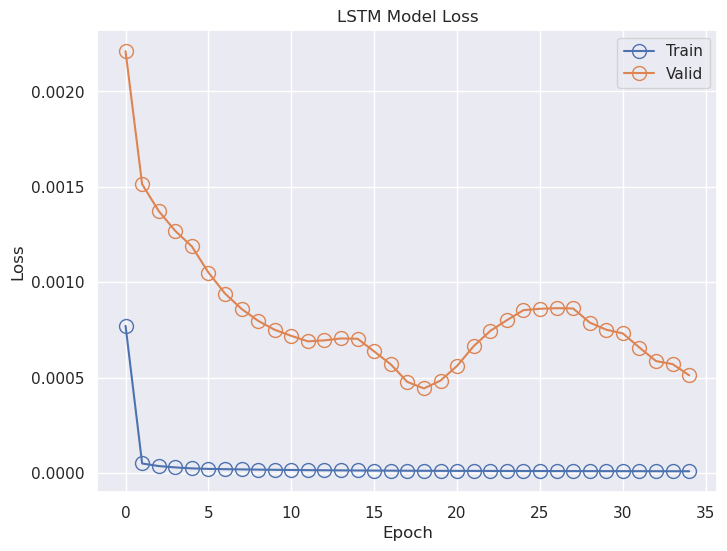

In [149]:
plot_1(history1, 'Training / Validation Losses from History')

In [150]:
def evaluate_predictions(predictions, ytest, outliers):
    ratio = []
    differences = []
    for pred in range(len(ytest)):
        ratio.append((ytest[pred]/predictions[pred])-1)
        differences.append(abs(ytest[pred]- predictions[pred]))


    n_outliers = int(len(differences) * outliers)
    outliers = pd.Series(differences).astype(float).nlargest(n_outliers)

    return ratio, differences, outliers

In [151]:
ratio, differences, outliers = evaluate_predictions(predictions, ytest, 0.01)

In [152]:
for index in outliers.index:
    outliers[index] = predictions[index]
outliers

209     0.444559
203     0.413408
202     0.407872
191     0.365557
205     0.425205
1090    0.815789
204     0.419749
1049    0.865291
1091    0.809349
636     0.685976
208     0.439468
dtype: float64

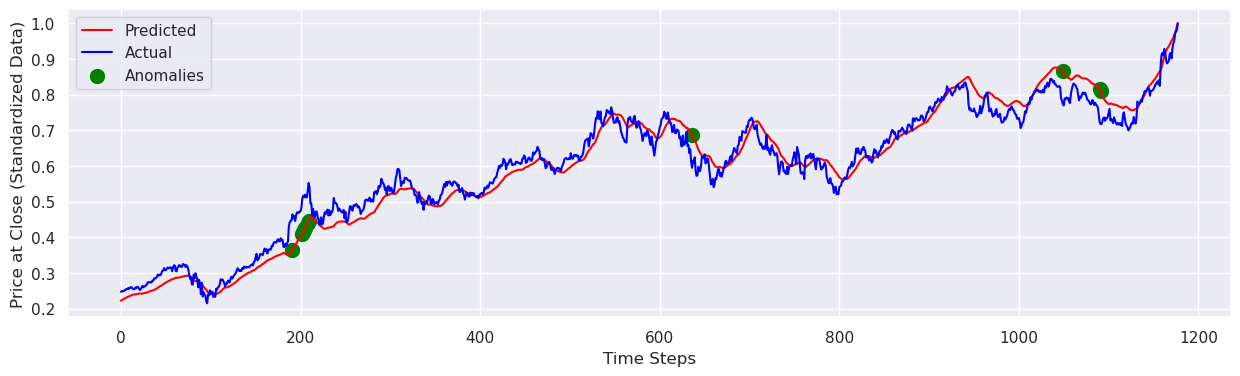

In [153]:

# Showing the predicted vs. actual values
fig, axs = plt.subplots()
fig.set_figheight(4)
fig.set_figwidth(15)

axs.plot(predictions,color='red', label='Predicted')
axs.plot(ytest,color='blue', label='Actual')
axs.scatter(outliers.index,outliers, color='green', linewidth=5.0, label='Anomalies')
plt.xlabel('Time Steps')
plt.ylabel('Price at Close (Standardized Data)')
plt.legend(loc='upper left')
plt.show()

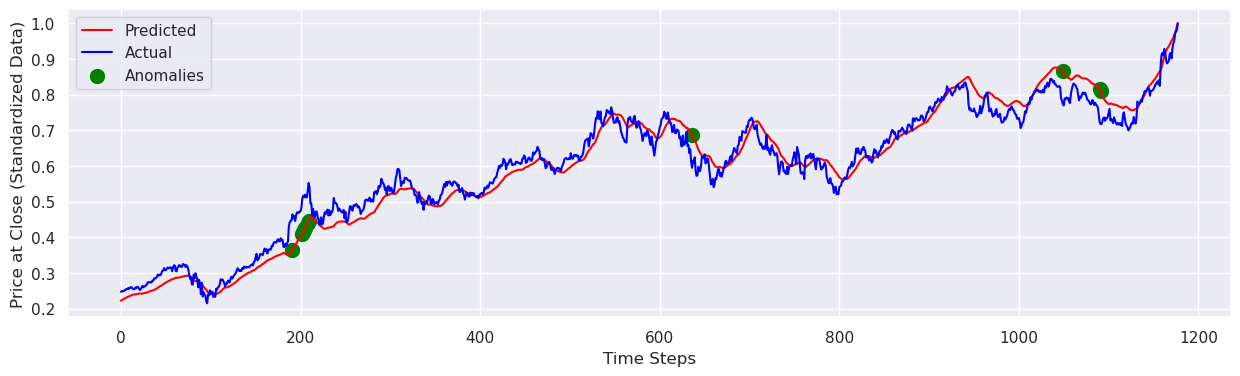

In [154]:

# Showing the predicted vs. actual values
fig, axs = plt.subplots()
fig.set_figheight(4)
fig.set_figwidth(15)

axs.plot(predictions,color='red', label='Predicted')
axs.plot(ytest,color='blue', label='Actual')
axs.scatter(outliers.index,outliers, color='green', linewidth=5.0, label='Anomalies')
plt.xlabel('Time Steps')
plt.ylabel('Price at Close (Standardized Data)')
plt.legend(loc='upper left')
plt.show()

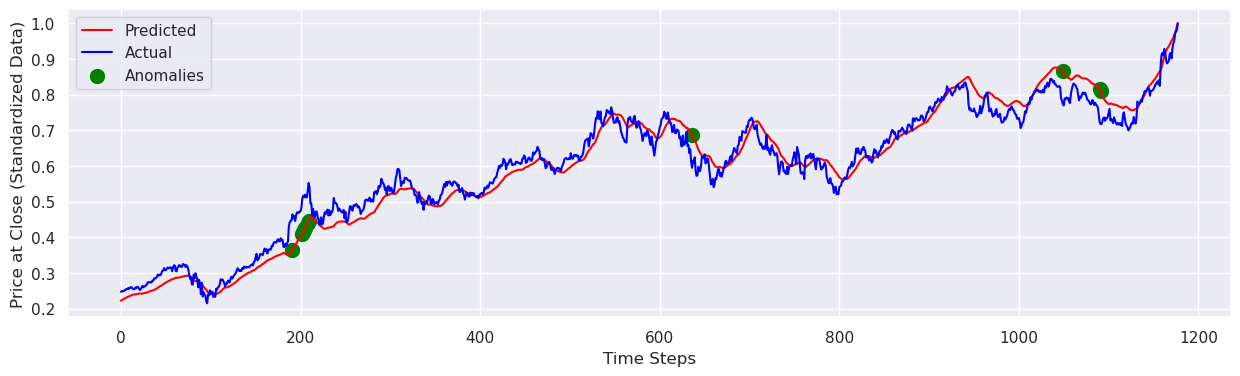

In [156]:

# Showing the predicted vs. actual values
fig, axs = plt.subplots()
fig.set_figheight(4)
fig.set_figwidth(15)

axs.plot(predictions,color='red', label='Predicted')
axs.plot(ytest,color='blue', label='Actual')
axs.scatter(outliers.index,outliers, color='green', linewidth=5.0, label='Anomalies')
plt.xlabel('Time Steps')
plt.ylabel('Price at Close (Standardized Data)')
plt.legend(loc='upper left')
plt.show()

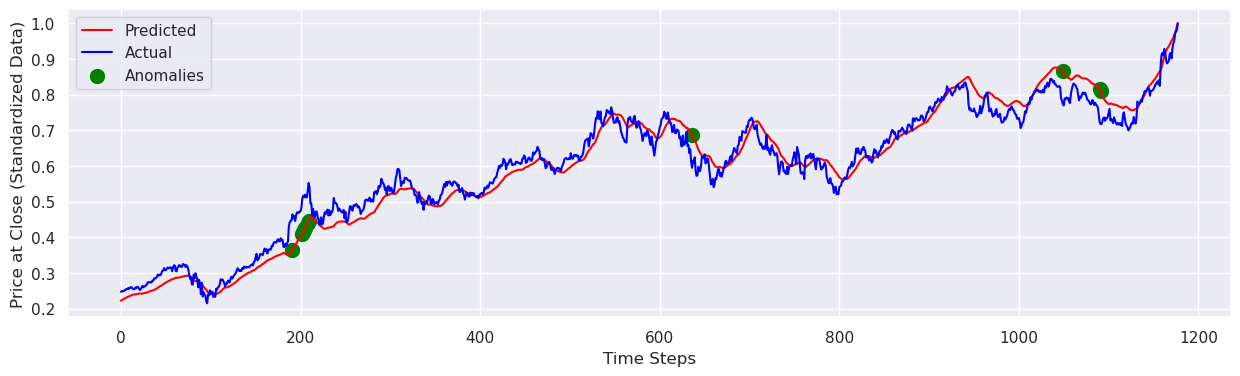

In [157]:

# Showing the predicted vs. actual values
fig, axs = plt.subplots()
fig.set_figheight(4)
fig.set_figwidth(15)

axs.plot(predictions,color='red', label='Predicted')
axs.plot(ytest,color='blue', label='Actual')
axs.scatter(outliers.index,outliers, color='green', linewidth=5.0, label='Anomalies')
plt.xlabel('Time Steps')
plt.ylabel('Price at Close (Standardized Data)')
plt.legend(loc='upper left')
plt.show()

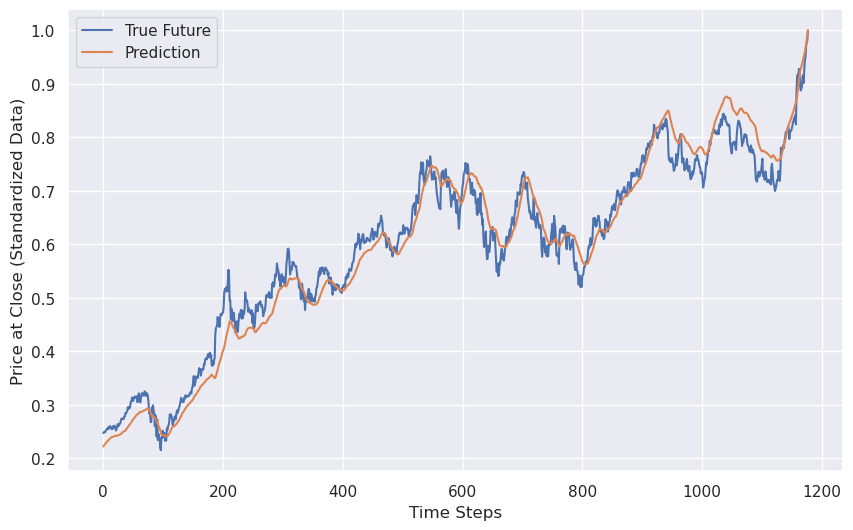

In [158]:
# Plot true future vs prediction plot true future (test data) vs prediction the three models.
plt.figure(figsize=(10, 6))
range_future = len(predictions)
plt.plot(np.arange(range_future), np.array(ytest),
             label='True Future')
plt.plot(np.arange(range_future),np.array(predictions),
            label='Prediction')
plt.legend(loc='upper left')
plt.xlabel('Time Steps')
plt.ylabel('Price at Close (Standardized Data)')
plt.show()


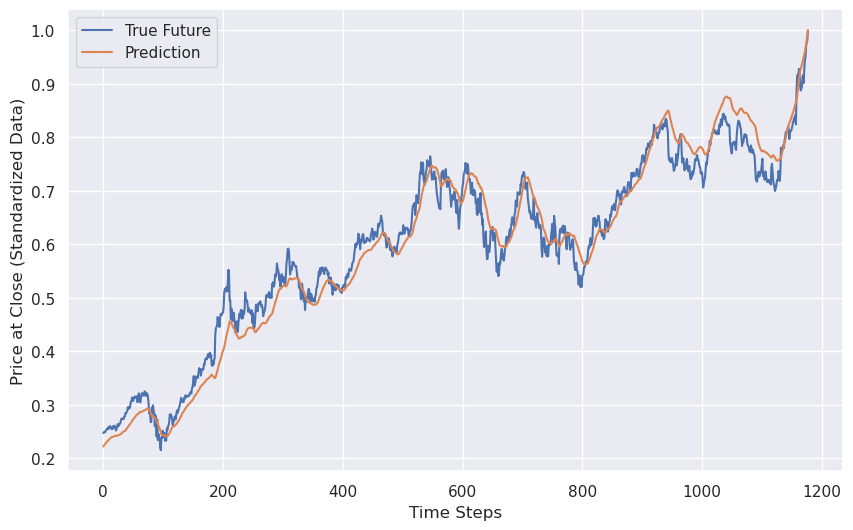

In [159]:
# Plot true future vs prediction plot true future (test data) vs prediction the three models.
plt.figure(figsize=(10, 6))
range_future = len(predictions)
plt.plot(np.arange(range_future), np.array(ytest),
             label='True Future')
plt.plot(np.arange(range_future),np.array(predictions),
            label='Prediction')
plt.legend(loc='upper left')
plt.xlabel('Time Steps')
plt.ylabel('Price at Close (Standardized Data)')
plt.show()


In [161]:
from sklearn.metrics import r2_score

# Calculate mean absolute error for test
mae = mean_absolute_error(ytest, predictions)
print("Mean Absolute Error:", mae)

# Calculate R2 score
r2 = r2_score(ytest, predictions)
print("R2 Score:", r2)

Mean Absolute Error: 0.02827611605241642
R2 Score: 0.9568072099541279
